In [ ]:
import sympy
from sympy import  Point, Line, Plane, Point3D, Segment, Ray, S, latex
import matplotlib.pyplot as plt

In [ ]:
class input_data:
  def __init__(this, data):
    this.input_data = data.split("\n")
    this.last_used_index = -1
  def get_input(this, question):
    this.last_used_index = this.last_used_index + 1
    if (this.last_used_index >= len(this.input_data)):
      this.input_data.append(input(question))
    else:
      print(f"""{question}{this.input_data[this.last_used_index]}""")
    return(this.input_data[this.last_used_index])
    
def input_points():
  points = {}
  points_amount = int(user_data.get_input("Введите количество точек: "))
  for i in range(points_amount):
    variable = user_data.get_input("Введите название и координаты переменной: ").split(' ')
    if (len(variable) == 3):
      points[variable[0]] = Point(variable[1], variable[2])
    if (len(variable) == 4):
      points[variable[0]] = Point(variable[1], variable[2], variable[3])
  return(points)

# Практическое занятие 8
# Алгебра
https://docs.sympy.org/latest/search.html?q=geometry

## Проекции, сегменты, лучи в модуле Geometry
### Задание 1.
Даны точки: $A(3, -2, 3)$,  $B(-2, 3, 1)$, 
$C(1, -8, 6)$, 
$D(1, 2, 4)$, 
$F(-7, 8, -1)$.

Составить отрезки $AB$ и $AC$ и лучи $CD$ и $BF$.

Найти: 

а) угол между лучами $CD$ и $BF$

б) направления луча $CD$ (xdirection, ydirection, zdirection)

в) длину отрезка $AB$

г) середину отрезка $AB$

In [ ]:
user_data = input_data("""5
A 3 -2 3
B -2 3 1
C 1 -8 6
D 1 2 4
F -7 8 -1""")

points = input_points()

AB = Segment(points["A"], points["B"])
AC = Segment(points["A"], points["C"])
CD = Ray(points["C"], points["D"])
BF = Ray(points["B"], points["F"])

Введите количество точек: 5
Введите название и координаты переменной: A 3 -2 3
Введите название и координаты переменной: B -2 3 1
Введите название и координаты переменной: C 1 -8 6
Введите название и координаты переменной: D 1 2 4
Введите название и координаты переменной: F -7 8 -1


In [ ]:
print("\033[95ma)")
display(CD.angle_between(BF))
print("\033[95mb)")
display(CD.xdirection)
display(CD.ydirection)
display(CD.zdirection)
print("\033[95mc)")
display(AB.length)
print("\033[95md)")
display(AB.midpoint)

a)


acos(3*sqrt(39)/26)

b)


0

oo

-oo

c)


3*sqrt(6)

d)


Point3D(1/2, 1/2, 2)

### Задание 2.
Построить прямую $CD$ и проекцию точки $F$ и отрезка $AB$  на эту прямую.

In [ ]:
CD = Line(points["C"], points["D"])
AB = Segment(points["A"], points["B"])

display(CD.projection(points["F"]))
display(CD.projection(AB))

Point3D(1, 227/26, 69/26)

Segment3D(Point3D(1, -43/26, 123/26), Point3D(1, 46/13, 48/13))

### Задание 3.
Построить серединный перпендикуляр отрезка $AC$, проходящий через точку $(8, -7, 9/2)$, найти для серединного перпендикуляра уравнение.

Указание: должен получиться сегмент, использовать S(9)/2.

In [ ]:
AC = Segment(points["A"], points["C"])
points["M"] = Point(8, -7, S(9) / 2)

AC.perpendicular_bisector(points["M"])

Segment3D(Point3D(8, -7, 9/2), Point3D(2, -5, 9/2))

### Задание 4
Даны точки: $A(3, -2)$, $B(-2, 3)$, $C(1, -8)$.

Построить на общем графике отрезки $AB$ и $AC$, серединный перпендикуляр отрезка  $AC$.

Точки $A$, $B$ и $C$ отметить и подписать именами.

Для одинакового масштаба по осям использовать 
ax.set_aspect('equal')

In [ ]:
class graph:
  def __init__(this):
    this.ax = plt.gca()
  def normalize(this):
    this.ax.set_aspect('equal')
    this.ax.spines['right'].set_color('none')
    this.ax.spines['top'].set_color('none')
    this.ax.set_ylabel('y')
    this.ax.set_xlabel('x')
    dx = this.ax.get_xlim()[1] - this.ax.get_xlim()[0]
    dy = this.ax.get_ylim()[1] - this.ax.get_ylim()[0]

    if (this.ax.get_ylim()[0] > 0 and this.ax.get_ylim()[1] > 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[0]))
      this.ax.plot(1, this.ax.get_ylim()[0], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[0], transform=this.ax.get_yaxis_transform())
    elif (this.ax.get_ylim()[0] < 0 and this.ax.get_ylim()[1] < 0):
      this.ax.spines['bottom'].set_position(('data', this.ax.get_ylim()[1]))
      this.ax.plot(1, this.ax.get_ylim()[1], ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40 + this.ax.get_ylim()[1], transform=this.ax.get_yaxis_transform())
    else:
      this.ax.spines['bottom'].set_position(('data', 0))
      this.ax.plot(1, 0, ">k", transform=this.ax.get_yaxis_transform(), clip_on=False)
      this.ax.xaxis.set_label_coords(1, -1.25 * dy / 40, transform=this.ax.get_yaxis_transform())

    if (this.ax.get_xlim()[0] > 0 and this.ax.get_xlim()[1] > 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[0]))
      this.ax.plot(this.ax.get_xlim()[0], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[0] + 0.075, 1, transform=this.ax.get_xaxis_transform())
    elif (this.ax.get_xlim()[0] < 0 and this.ax.get_xlim()[1] < 0):
      this.ax.spines['left'].set_position(('data', this.ax.get_xlim()[1]))
      this.ax.plot(this.ax.get_xlim()[1], 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3 + this.ax.get_xlim()[1], 1, transform=this.ax.get_xaxis_transform())
    else:
      this.ax.spines['left'].set_position(('data', 0))
      this.ax.plot(0, 1, "^k", transform=this.ax.get_xaxis_transform(), clip_on=False)
      this.ax.yaxis.set_label_coords(0.15 * dx / 3, 1, transform=this.ax.get_xaxis_transform())

  def create_legend(this):
    this.ax.legend(loc='best')
  def set_y(this, min, max):
    this.ax.set(ylim=(min, max))

  def draw_segment(this, seg):
    line = Line(Point(seg.p1.x, seg.p1.y), Point(seg.p2.x, seg.p2.y))
    pict.ax.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], label=f"""${latex(sympy.Eq(line.equation(x='x', y='y'), 0))}$""")
  def draw_points(this, names, points):
    x_coords = []
    y_coords = []
    for i in range(len(names)):
      x_coords.append(points[names[i]].x)
      y_coords.append(points[names[i]].y)
    pict.ax.scatter(x_coords, y_coords)
    for i in range(len(names)):
      pict.ax.annotate(names[i], xy=(points[names[i]].x, points[names[i]].y), xycoords='data', xytext=(points[names[i]].x + 0.25, points[names[i]].y + 0.25), textcoords='data')
  def draw_lines(this, l1, l2, base1, base2):
    l1 = Line(Point(l1.p1.x, l1.p1.y), Point(l1.p2.x, l1.p2.y))
    l2 = Line(Point(l2.p1.x, l2.p1.y), Point(l2.p2.x, l2.p2.y))
    intersection = [*l1.intersect(l2)][0]
    this.draw_segment(Segment(base1, intersection))
    this.draw_segment(Segment(base2, intersection))
    return(intersection)  

Введите количество точек: 3
Введите название и координаты переменной: A 3 -2
Введите название и координаты переменной: B -2 3
Введите название и координаты переменной: C 1 -8


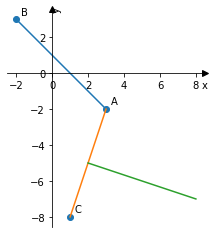

In [ ]:
user_data = input_data("""3
A 3 -2
B -2 3
C 1 -8""")

points = input_points()

AB = Segment(points["A"], points["B"])
AC = Segment(points["A"], points["C"])

pict = graph()
pict.draw_segment(AB)
pict.draw_segment(AC)
bisect = AC.perpendicular_bisector()
pict.draw_segment(bisect)

pict.draw_points(["A", "B", "C"], points)

pict.normalize()

### Индивидуальное задание.
Даны точки на плоскости. 

Вариант N 2

Точки: $L(-4, 1)$, $M(11, 1)$, $N(0, 8)$, $P(-3, 11/4)$.

Построить отрезок $LM$ и луч $MN$, составить уравнения серединного перпендикуляра  к $LM$ и перпендикуляра к $MN$, проходящего через точку $P$, найти точку пересечения перпендикуляров.

Построить на графике отрезок, луч (в виде отрезка) и оба перпендикуляра, отметить и подписать концы отрезка и начало луча (точку M), а также точку пересечения перпендикуляров и основания перпендикуляров (точки пересечения перпендикуляров с отрезком и лучом соответственно).

В легенду включить уравнения перпендикуляров и уравнения прямых, на которых лежат отрезок и
 луч.

Введите количество точек: 3
Введите название и координаты переменной: L -4 1
Введите название и координаты переменной: M 11 1
Введите название и координаты переменной: N 0 8


11*x - 7*y + 209/4

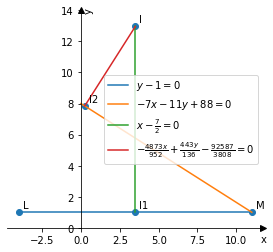

In [ ]:
user_data = input_data("""3
L -4 1
M 11 1
N 0 8""")

points = input_points()
points["P"] = Point(-3, S(11) / 4)

LM = Segment(points["L"], points["M"])
MN = Ray(points["M"], points["N"])

LM_bisect = LM.perpendicular_bisector()
MN_bisect = MN.perpendicular_line(points["P"])
display(MN_bisect.equation(x='x', y='y'))

base1 = [*LM_bisect.intersect(LM)][0]
base2 = [*MN_bisect.intersect(MN)][0]

pict = graph()

pict.draw_segment(LM)
pict.draw_segment(MN)
intersection = pict.draw_lines(LM_bisect, MN_bisect, base1, base2)


points_to_draw = {"L": points["L"], "M": points["M"], "I": intersection, "I1": base1, "I2": base2}
pict.draw_points(["L", "M", "I", "I1", "I2"], points_to_draw)

pict.set_y(0, 14)
pict.create_legend()
pict.normalize()